# Toward Predicting the Used Cars Price

### Step 1: Data Cleaning

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Loading the raw data

In [3]:
raw_data = pd.read_csv('Used Cars Price.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 220.7+ KB


### Determining the variables of interest

In [7]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [10]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

### Exploring the PDFs

<AxesSubplot:xlabel='Price', ylabel='Density'>

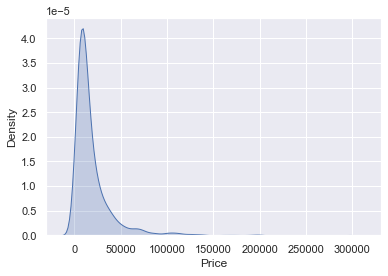

In [11]:
sns.kdeplot(raw_data['Price'],shade=True)

<AxesSubplot:xlabel='Price', ylabel='Density'>

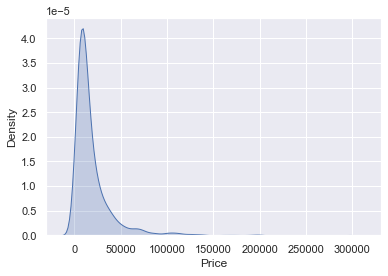

In [12]:
sns.kdeplot(data['Price'],shade=True)

<AxesSubplot:xlabel='Price', ylabel='Density'>

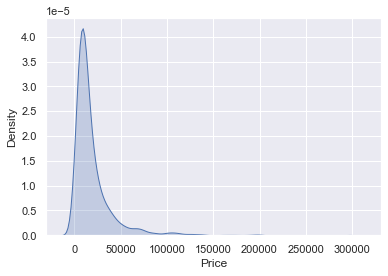

In [13]:
sns.kdeplot(data_no_mv['Price'],shade=True)

In [14]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot:xlabel='Price', ylabel='Density'>

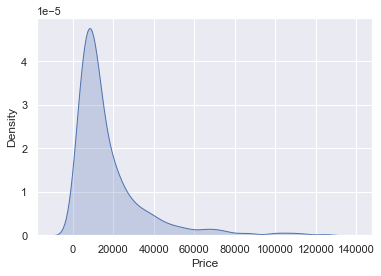

In [15]:
sns.kdeplot(data_1['Price'],shade=True)

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

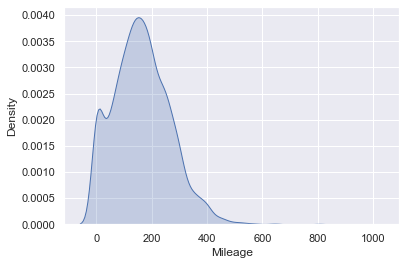

In [16]:
sns.kdeplot(data_no_mv['Mileage'],shade=True)

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

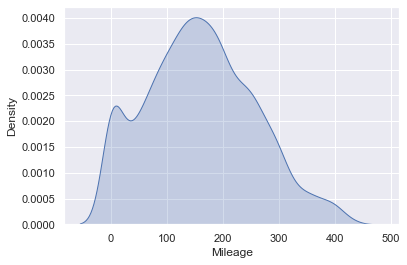

In [17]:
q = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_no_mv[data_no_mv['Mileage']<q]
sns.kdeplot(data_2['Mileage'],shade=True)

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

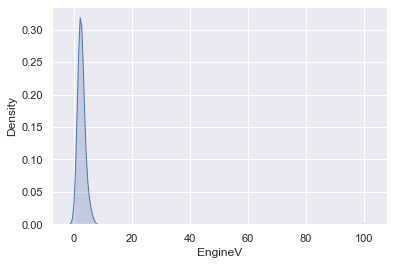

In [18]:
sns.kdeplot(data_no_mv['EngineV'], shade = True)

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

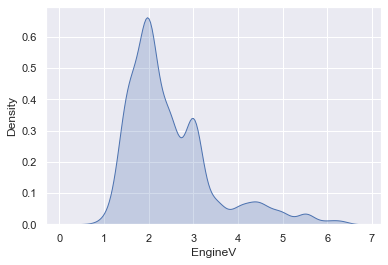

In [19]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.kdeplot(data_3['EngineV'],shade=True)

<AxesSubplot:xlabel='Year', ylabel='Density'>

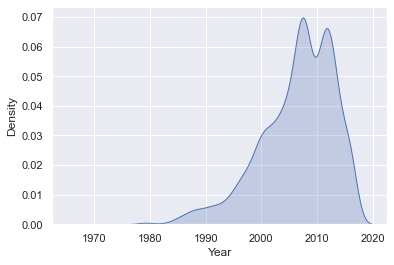

In [20]:
sns.kdeplot(data_no_mv['Year'],shade=True)

<AxesSubplot:xlabel='Year', ylabel='Density'>

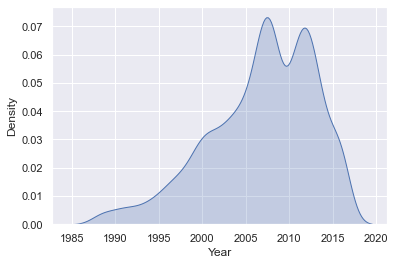

In [21]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.kdeplot(data_4['Year'],shade=True)

In [22]:
data_cleaned = data_4.reset_index(drop=True)

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3907,3907.000000,3907,3907.000000,3907.000000,3907,3907,3907.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1472,NaN,NaN,1815,3545,NaN
mean,NaN,19960.692119,NaN,158.929358,2.474771,NaN,NaN,2006.798055
std,NaN,26048.838086,NaN,96.242696,0.978819,NaN,NaN,6.127291
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7274.500000,NaN,89.500000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Step 2: Checking the Regression Assumptions

### 1- Linearity

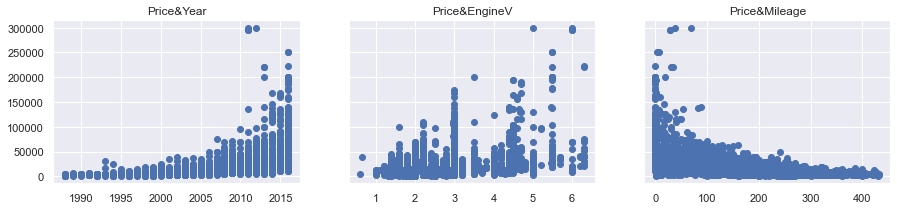

In [24]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))

ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price&Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price&EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price&Mileage')

plt.show()

In [25]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3902,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


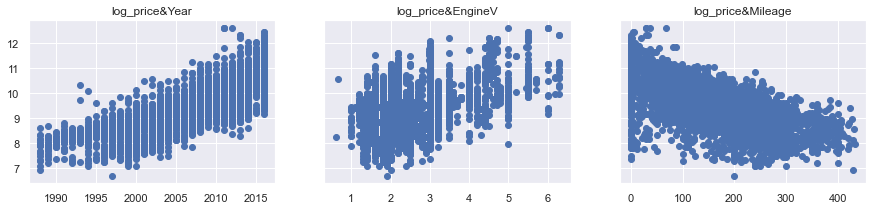

In [26]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))

ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price&Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price&EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price&Mileage')

plt.show()

In [27]:
data_cleaned_2 = data_cleaned.drop(['Price'],axis=1)
data_cleaned_2

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3902,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### 2- No Endogeneity
We will talk about this issue later.

KeyWords: Hausman test, IV, 2SLS, GMM, ...

See the following link:

A good example: https://python.quantecon.org/ols.html#Endogeneity

How we can intrpret our results: https://stats.stackexchange.com/questions/210696/how-to-interpret-hausman-test-results

Documentations of linearmodels library: https://bashtage.github.io/linearmodels/doc/iv/introduction.html

### 3- Normality and Homoscedasticity
Just check the above graphs. Since `intercept` has been included in our model, so the mean of error is ZERO.

### 4- No Autocorrelation
We should not be worry, because our data is not a ti

### 5- No Multicollinearity
#### VIF (Variance Inflation Factor) and its application in detecting `Multicollinearity`

#### If VIF > 10, then multicollinearity is high and we should remove that item.

In [ ]:
data_cleaned_2.columns

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned_2[['Mileage','EngineV','Year']]
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.703266,Mileage
1,7.400348,EngineV
2,10.323287,Year


In [29]:
data_no_multicollinearity = data_cleaned_2.drop(['Year'],axis=1)

In [30]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3902,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3903,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3904,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3905,BMW,sedan,1,3.5,Petrol,yes,8.779557


## Step 3: Create `dummy Variables`


### Note that if we have N categories for a feature, we have to create N-1 dummies.

# Note:  if we include a seprate dummy variable 
 # for each category we will introduce multicollinearity to the regression

In [31]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3903,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3904,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3905,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [32]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [33]:
new_columns = ['log_price', 'EngineV', 'Mileage', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [36]:
data_preprocessed = data_with_dummies[new_columns]
data_preprocessed

,log_price,EngineV,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,2.0,277,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,2.9,427,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,5.0,358,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,4.2,240,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,2.0,120,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,9.350102,2.5,163,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3903,9.792556,1.6,35,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3904,11.736069,3.0,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3905,8.779557,3.5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Step 4: Creating the `Linear Regression Model`

In [37]:
target  =data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)

inputs_scaler = scaler.transform(inputs)

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs_scaler,target,test_size=0.33,random_state=99)
#x_train,x_test,y_train,y_test = train_test_split(inputs_scaler,target,test_size=0.2,random_state=42)

In [56]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [57]:
y_hat = reg.predict(x_train)

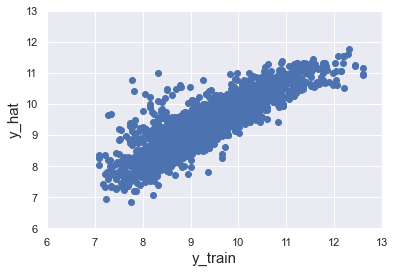

In [58]:
plt.scatter(y_train,y_hat)
plt.xlabel('y_train',size=15)
plt.ylabel('y_hat' ,size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

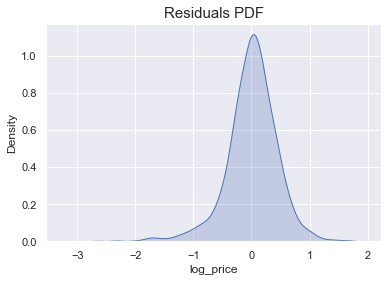

In [59]:
sns.kdeplot(y_train - y_hat,shade=True)
plt.title('Residuals PDF',size=15)

In [60]:
reg.score(x_train,y_train)

0.759596931204792

In [61]:
reg.coef_

array([ 0.2598663 , -0.48242487,  0.01599246,  0.02577465, -0.14311137,
       -0.18112165, -0.06084573, -0.08093424, -0.14102261, -0.08250394,
       -0.1823306 , -0.10989583, -0.14235752, -0.12035152, -0.0376778 ,
       -0.138745  ,  0.31752507])

In [62]:
reg.intercept_

9.447287752855901

In [64]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['features'])
reg_summary['Weight'] = reg.coef_
reg_summary

,features,Weight
0,EngineV,0.259866
1,Mileage,-0.482425
2,Brand_BMW,0.015992
3,Brand_Mercedes-Benz,0.025775
4,Brand_Mitsubishi,-0.143111
5,Brand_Renault,-0.181122
6,Brand_Toyota,-0.060846
7,Brand_Volkswagen,-0.080934
8,Body_hatch,-0.141023
9,Body_other,-0.082504


## Step 5: Testing our Model


In [65]:
y_hat_test = reg.predict(x_test)

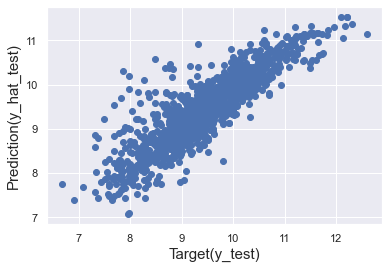

In [67]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Target(y_test)',size=15)
plt.ylabel('Prediction(y_hat_test)',size=15)
plt.xlim=(6,13)
plt.ylim=(6,13)
plt.show()

In [74]:
df_perf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_perf.head()

,Prediction
0,6774.946956
1,9075.530565
2,19726.355070
3,8103.003962
4,45765.668086


In [73]:
df_perf['Target']=np.exp(y_test)
df_perf.head()

,Prediction,Target
0,6774.946956,NaN
1,9075.530565,7900.0
2,19726.355070,NaN
3,8103.003962,NaN
4,45765.668086,NaN


In [75]:
y_test.head()

2383     8.922658
2365     9.093807
2216    10.161998
2838     8.935904
3429    10.799576
Name: log_price, dtype: float64

In [78]:
y_test= y_test.reset_index(drop=True)
y_test.head()

0     8.922658
1     9.093807
2    10.161998
3     8.935904
4    10.799576
Name: log_price, dtype: float64

In [82]:
df_perf['Target'] = np.exp(y_test)
df_perf

,Prediction,Target
0,6774.946956,7500.0
1,9075.530565,8900.0
2,19726.355070,25900.0
3,8103.003962,7600.0
4,45765.668086,49000.0
...,...,...
1285,9475.953934,9500.0
1286,6061.064520,4400.0
1287,7375.000742,8100.0
1288,48542.606950,37500.0


In [84]:

df_perf['Residual'] = df_perf['Target'] - df_perf['Prediction']

df_perf['Percent Error'] = np.absolute(df_perf['Residual']/df_perf['Target']*100)

df_perf

,Prediction,Target,Residual,Percent Error
0,6774.946956,7500.0,725.053044,9.667374
1,9075.530565,8900.0,-175.530565,1.972254
2,19726.355070,25900.0,6173.644930,23.836467
3,8103.003962,7600.0,-503.003962,6.618473
4,45765.668086,49000.0,3234.331914,6.600677
...,...,...,...,...
1285,9475.953934,9500.0,24.046066,0.253116
1286,6061.064520,4400.0,-1661.064520,37.751466
1287,7375.000742,8100.0,724.999258,8.950608
1288,48542.606950,37500.0,-11042.606950,29.446952


In [85]:
df_perf.describe()

,Prediction,Target,Residual,Percent Error
count,1290.000000,1290.000000,1290.000000,1290.000000
mean,17039.711399,18912.037109,1872.325709,38.263524
std,14915.381258,24024.418350,14042.547465,68.719605
min,1167.677989,800.000000,-44577.009974,0.015739
25%,7364.874362,7000.000000,-2503.549798,11.198445
50%,12077.081816,11763.500000,107.899525,23.965914
75%,21550.501947,21575.000000,3140.729579,40.573749
max,102731.648034,295000.000000,225367.712126,1046.567381


In [86]:
pd.options.display.max_rows = 999

df_perf.sort_values(by=['Percent Error'], inplace=True)

df_perf

,Prediction,Target,Residual,Percent Error
888,11701.841439,11700.0,-1.841439,0.015739
27,21809.012616,21800.0,-9.012616,0.041342
637,5795.633523,5800.0,4.366477,0.075284
933,32453.253003,32400.0,-53.253003,0.164361
1156,3708.534779,3700.0,-8.534779,0.230670
...,...,...,...,...
297,16387.304130,2500.0,-13887.304130,555.492165
344,20142.301588,2900.0,-17242.301588,594.562124
602,39319.045494,4800.0,-34519.045494,719.146781
249,26675.031275,2900.0,-23775.031275,819.828665


In [87]:
np.round(df_perf, 3)

,Prediction,Target,Residual,Percent Error
888,11701.841,11700.0,-1.841,0.016
27,21809.013,21800.0,-9.013,0.041
637,5795.634,5800.0,4.366,0.075
933,32453.253,32400.0,-53.253,0.164
1156,3708.535,3700.0,-8.535,0.231
...,...,...,...,...
297,16387.304,2500.0,-13887.304,555.492
344,20142.302,2900.0,-17242.302,594.562
602,39319.045,4800.0,-34519.045,719.147
249,26675.031,2900.0,-23775.031,819.829


In [88]:
np.round(reg_summary, 2)

,features,Weight
0,EngineV,0.26
1,Mileage,-0.48
2,Brand_BMW,0.02
3,Brand_Mercedes-Benz,0.03
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.08
8,Body_hatch,-0.14
9,Body_other,-0.08


## Our Model

$\hat{y} = -0.48\times Mileage + 0.26\times EngineV + 0.02\times Brand\_BMW + \ldots + 0.32\times Registration\_yes$